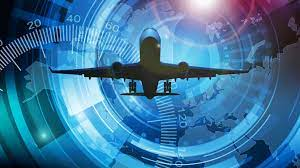

# Aviation Incidents

# Overview


This project analyzes aviation incidents to identify airplane models with the least amount of incidents and their engine counts. By cleaning and examining the aviation dataset, the goal is to highlight the safest airplane models for the aviation division.

# Business Understanding
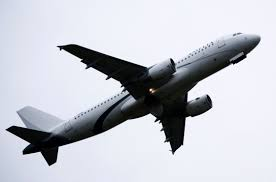

The project aims to assist the aviation division in selecting low-risk airplane models based on incident frequency and engine count, promoting company growth in the aviation sector.

# Data Understanding 

The dataset includes airplane models, engine counts, and injury reports from aviation accidents.

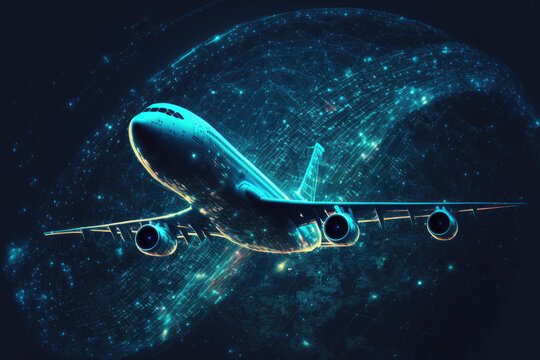

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
aviation_data = pd.read_csv("./data/Aviation_Data.csv", low_memory=False)

In [3]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Aviation Data
The aviation dataset includes records from 1962 to 2023, and includes models of plane, number of engines, and injury severity.

In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
aviation_data['Accident Date'] =  pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Accident Date'].describe()

count                            88889
mean     1999-09-17 17:13:39.354476032
min                1948-10-24 00:00:00
25%                1989-01-15 00:00:00
50%                1998-07-18 00:00:00
75%                2009-07-01 00:00:00
max                2022-12-29 00:00:00
Name: Accident Date, dtype: object

## Number of Engines data

In [8]:
aviation_data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

## Engine Type

In [9]:
aviation_data['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

## Make

In [10]:
aviation_data['Make'].str.lower().value_counts()[:50]

Make
cessna                            27149
piper                             14870
beech                              5372
boeing                             2745
bell                               2722
mooney                             1334
robinson                           1230
grumman                            1172
bellanca                           1045
hughes                              932
schweizer                           773
air tractor                         691
aeronca                             636
mcdonnell douglas                   608
maule                               589
champion                            519
stinson                             439
aero commander                      429
de havilland                        422
luscombe                            414
aerospatiale                        388
taylorcraft                         383
north american                      383
rockwell                            355
hiller                             

## Injury Severity

In [11]:
aviation_data['Injury.Severity'].value_counts()[:50]

Injury.Severity
Non-Fatal      67357
Fatal(1)        6167
Fatal           5262
Fatal(2)        3711
Incident        2219
Fatal(3)        1147
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Fatal(18)          5
Fatal(20)          5
Fatal(15)          5
Fatal(25)          4
Fatal(23)          4
Fatal(19)          3
Fatal(16)          3
Fatal(34)          3
Fatal(17)          3
Fatal(104)         2
Fatal(65)          2
Fatal(97)          2
Fatal(349)         2
Fatal(75)          2
Fatal(46)          2
Fatal(71)          2
Fatal(154)         2
Fatal(113)         2
Fatal(102)         2
Fatal(24)          2
Fatal(92)          2
Fatal(118)         2
Fatal(52)          2
Fatal(160)         2
Fatal(29)          2
Fatal(82)          2
Fatal(131)        

# Data Preperation

## Data Cleaning

The analysis focuses on identifying airplanes with average engine counts and the lowest risk, using data cleaning and descriptive statistics.

In [12]:
# look up columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Accident Date'],
      dtype='object')

In [13]:
# Narrowing down the dataset to 3 columns
aviation_data = aviation_data[['Make', 'Injury.Severity', 'Number.of.Engines', 'Engine.Type']]

In [14]:
aviation_data.head()

,Make,Injury.Severity,Number.of.Engines,Engine.Type
0,Stinson,Fatal(2),1.0,Reciprocating
1,Piper,Fatal(4),1.0,Reciprocating
2,Cessna,Fatal(3),1.0,Reciprocating
3,Rockwell,Fatal(2),1.0,Reciprocating
4,Cessna,Fatal(1),NaN,NaN


In [15]:
# I will drop NaN from the dataset
aviation_data = aviation_data.dropna(inplace=False,how='any',axis=0)
aviation_data

,Make,Injury.Severity,Number.of.Engines,Engine.Type
0,Stinson,Fatal(2),1.0,Reciprocating
1,Piper,Fatal(4),1.0,Reciprocating
2,Cessna,Fatal(3),1.0,Reciprocating
3,Rockwell,Fatal(2),1.0,Reciprocating
5,Mcdonnell Douglas,Non-Fatal,2.0,Turbo Fan
...,...,...,...,...
90098,CESSNA,Non-Fatal,1.0,Reciprocating
90106,CESSNA,Non-Fatal,1.0,Reciprocating
90120,BEECH,Non-Fatal,2.0,Reciprocating
90194,STEPHEN J HOFFMAN,Minor,1.0,Reciprocating


In [16]:
aviation_data.head()

,Make,Injury.Severity,Number.of.Engines,Engine.Type
0,Stinson,Fatal(2),1.0,Reciprocating
1,Piper,Fatal(4),1.0,Reciprocating
2,Cessna,Fatal(3),1.0,Reciprocating
3,Rockwell,Fatal(2),1.0,Reciprocating
5,Mcdonnell Douglas,Non-Fatal,2.0,Turbo Fan


Looking for duplicates to reduce any inaccurate data.

In [17]:
# look for duplicates in dataset
aviation_data.duplicated()

0        False
1        False
2        False
3        False
5        False
         ...  
90098     True
90106     True
90120     True
90194    False
90226     True
Length: 79597, dtype: bool

In [29]:
# Drop duplicates 
aviation_data.drop_duplicates(inplace=True)
aviation_data

,Make,Injury.Severity,Number.of.Engines,Engine.Type
0,Stinson,Fatal(2),1.0,Reciprocating
1,Piper,Fatal(4),1.0,Reciprocating
2,Cessna,Fatal(3),1.0,Reciprocating
3,Rockwell,Fatal(2),1.0,Reciprocating
5,Mcdonnell Douglas,Non-Fatal,2.0,Turbo Fan
...,...,...,...,...
90009,MOSSMAN MICHAEL D,Non-Fatal,1.0,Reciprocating
90028,DESTINY,Serious,1.0,Reciprocating
90030,HIBBARD NORMAN E,Minor,1.0,Reciprocating
90096,WASZAK ARTHUR B,Non-Fatal,1.0,Reciprocating


In [19]:
aviation_data.head(15)

,Make,Injury.Severity,Number.of.Engines,Engine.Type
0,Stinson,Fatal(2),1.0,Reciprocating
1,Piper,Fatal(4),1.0,Reciprocating
2,Cessna,Fatal(3),1.0,Reciprocating
3,Rockwell,Fatal(2),1.0,Reciprocating
5,Mcdonnell Douglas,Non-Fatal,2.0,Turbo Fan
6,Cessna,Fatal(4),1.0,Reciprocating
7,Cessna,Non-Fatal,1.0,Reciprocating
8,Cessna,Non-Fatal,2.0,Reciprocating
9,North American,Non-Fatal,1.0,Reciprocating
10,Piper,Non-Fatal,1.0,Reciprocating


In [20]:
# Group the columns together
aviation_data.groupby(['Injury.Severity','Number.of.Engines'])

In [21]:
aviation_data.groupby(['Injury.Severity','Number.of.Engines']).mean(numeric_only=True)

Empty DataFrame
Columns: []
Index: [(Fatal, 1.0), (Fatal, 2.0), (Fatal, 3.0), (Fatal, 4.0), (Fatal(1), 0.0), (Fatal(1), 1.0), (Fatal(1), 2.0), (Fatal(1), 3.0), (Fatal(1), 4.0), (Fatal(10), 0.0), (Fatal(10), 1.0), (Fatal(10), 2.0), (Fatal(11), 2.0), (Fatal(110), 2.0), (Fatal(111), 3.0), (Fatal(113), 2.0), (Fatal(12), 2.0), (Fatal(13), 0.0), (Fatal(13), 2.0), (Fatal(131), 3.0), (Fatal(132), 2.0), (Fatal(135), 3.0), (Fatal(14), 2.0), (Fatal(14), 3.0), (Fatal(144), 4.0), (Fatal(15), 2.0), (Fatal(153), 3.0), (Fatal(156), 2.0), (Fatal(16), 2.0), (Fatal(17), 1.0), (Fatal(17), 2.0), (Fatal(174), 4.0), (Fatal(18), 2.0), (Fatal(19), 2.0), (Fatal(2), 0.0), (Fatal(2), 1.0), (Fatal(2), 2.0), (Fatal(2), 3.0), (Fatal(2), 4.0), (Fatal(20), 2.0), (Fatal(21), 2.0), (Fatal(217), 2.0), (Fatal(228), 4.0), (Fatal(23), 2.0), (Fatal(230), 4.0), (Fatal(25), 1.0), (Fatal(25), 2.0), (Fatal(256), 4.0), (Fatal(265), 2.0), (Fatal(27), 2.0), (Fatal(27), 4.0), (Fatal(270), 4.0), (Fatal(28), 2.0), (Fatal(29), 2.0), (Fatal(29), 3.0), (Fatal(3), 0.0), (Fatal(3), 1.0), (Fatal(3), 2.0), (Fatal(3), 4.0), (Fatal(30), 2.0), (Fatal(31), 2.0), (Fatal(34), 2.0), (Fatal(37), 2.0), (Fatal(4), 0.0), (Fatal(4), 1.0), (Fatal(4), 2.0), (Fatal(4), 4.0), (Fatal(43), 4.0), (Fatal(47), 0.0), (Fatal(49), 2.0), (Fatal(5), 0.0), (Fatal(5), 1.0), (Fatal(5), 2.0), (Fatal(5), 3.0), (Fatal(5), 4.0), (Fatal(6), 0.0), (Fatal(6), 1.0), (Fatal(6), 2.0), (Fatal(6), 3.0), (Fatal(6), 4.0), (Fatal(60), 2.0), (Fatal(65), 2.0), (Fatal(68), 2.0), (Fatal(7), 1.0), (Fatal(7), 2.0), (Fatal(7), 4.0), (Fatal(70), 2.0), (Fatal(70), 4.0), (Fatal(73), 4.0), (Fatal(78), 2.0), (Fatal(8), 0.0), (Fatal(8), 1.0), (Fatal(8), 2.0), (Fatal(8), 3.0), (Fatal(82), 1.0), (Fatal(82), 2.0), (Fatal(87), 0.0), (Fatal(88), 2.0), (Fatal(9), 1.0), (Fatal(9), 2.0), ...]

[121 rows x 0 columns]

In [22]:
aviation_data.groupby('Number.of.Engines').sum().agg(['count'])

,Make,Injury.Severity,Engine.Type
count,6,6,6


In [27]:
# Save cleaned dataset as csv
aviation_data.to_csv('aviation_datamakeenginjurengtype.csv')

# Exploratory Data Analysiss

In [24]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Number of Engines, Models, and Injury Severity

In [25]:
# Summarize Number of Engines
aviation_data['Number.of.Engines'].describe(include = "all")

count    9996.000000
mean        1.128051
std         0.478042
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: Number.of.Engines, dtype: float64

In [26]:
# Summarize Model of plane
aviation_data['Model'].describe(include = "all")

KeyError: 'Model'

In [ ]:
# Summarize Injury Severity
aviation_data['Injury.Severity'].describe(include = "all")

In [ ]:
# Create a plot
aviation_data = pd.core.frame.DataFrame({'Model':[108-3,'PA24-180','172M','112','DC9','180','140'],'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.bar(x='Model', y='Number.of.Engines', rot=0)

aviation_data = pd.core.frame.DataFrame({'Injury.Severity':['Fatal(2)','Fatal(4)','Fatal(3)','Fatal(2)','Non-Fatal','Fatal(4)','Non-Fatal'], 'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.bar(x='Injury.Severity', y='Number.of.Engines', rot=0)

In [ ]:
# Create a plot
aviation_data = pd.core.frame.DataFrame({'Model':[108-3,'PA24-180','172M','112','DC9','180','140'],'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.line(x='Model', y='Number.of.Engines', rot=0)

aviation_data = pd.core.frame.DataFrame({'Injury.Severity':['Fatal(2)','Fatal(4)','Fatal(3)','Fatal(2)','Non-Fatal','Fatal(4)','Non-Fatal'], 'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.line(x='Injury.Severity', y='Number.of.Engines', rot=0)

# Conclusions

This analysis leads with the model of plane with the least amount incidents with the ideal amount of number of engines:
- **Number of Engines.**
      On average each plane with the least amount of incidents had only one engine.

- **Model of plane.**
    DC-9 model plane has the most engines with the least amount of incidents
- **Injury Severity.**
      all injury incidents were non-fatal for the planes that fit the companies risk free decision.

# Recommendations

- **The planes with the least amount of incidents.** The company should go with the plane with non-fatal injuries for safety precautions.
- **Saving money based on how many engines there is.** The plane that has less engines and low incident reports will cost less in the future.
- **Every year evaluation.** Every year the company can expand their aviation side to gather more planes for business projects/improvements.

# Limitations

- **The data set lacks the know how.** In the data set doesn't show you how a plane had an incident, knowing that would help narrow down malfunctions or
  weather.

- **Cost of each plane.** The lack of cost for each individual plane and how much it would cost to repair them/salvage them.
  

# Next Steps

Further analyses could yield additional insights to further improve choice of model plane:

- **Better predictions for model plane based off repairing cost.** This modeling could already use avaialable data such as how bad the crash was.

- **Predicting undesirable outcomes.** Knowing that the weather is really bad should delay the flight until further notice

